In [2]:
using Plots, StatsBase
include("../code/bp_full.jl")

update_factor_bp_new! (generic function with 1 method)

## 1. No leaves

In [47]:
ns = 300 * round.(Int, (2 .^ (4:0.5:7)))
@show ns
f3s = 0.01:0.07:0.36
F = length(f3s)
nflips = [[zeros(n) for n in ns] for f3 in f3s]
navg = 20;

ns = [4800, 6900, 9600, 13500, 19200, 27300, 38400]


In [5]:
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f3 = $f3 ---")
        f1 = 0.0
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
        m = Int(nedges/3)
        H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
    end
end


#### size 1 of 7: n=4800 ####
--- degree 1 of 6: f3 = 0.01 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 2 of 6: f3 = 0.08 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 3 of 6: f3 = 0.15 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 4 of 6: f3 = 0.22 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 5 of 6: f3 = 0.29 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 6 of 6: f3 = 0.36 ---
sum(sum(H, dims = 1) == 1) = 0

#### size 2 of 7: n=6900 ####
--- degree 1 of 6: f3 = 0.01 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 2 of 6: f3 = 0.08 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 3 of 6: f3 = 0.15 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 4 of 6: f3 = 0.22 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 5 of 6: f3 = 0.29 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 6 of 6: f3 = 0.36 ---
sum(sum(H, dims = 1) == 1) = 0

#### size 3 of 7: n=9600 ####
--- degree 1 of 6: f3 = 0.01 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 2 of 6: f3 = 0.08 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 

In [6]:
n_not_converged = 0
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f3 = $f3 ---")
        f1 = 0.0
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
        m = Int(nedges/3)

        s = ones(n)
        efield = [(si,-si) .- 1 for si in s]
        
        ε = Inf
        tol = 1e-12
        max_att = 50
        nconverged = 0
        for a in 1:navg
            for attempt in 1:max_att
                H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
                maxsum = BPFull(H, efield)
                ε, iters = iteration!(maxsum, maxiter=300, damp=0.0, tol=tol,
                    update_f! = update_factor_ms!, update_v! = update_var_ms!)
                @show ε, iters
                if ε < tol 
                    println("Avg $a of $navg: converged after $attempt attempts")  
                    nflips[i][j] += [abs(b[2]) for b in maxsum.belief]
                    nconverged += 1
                    break
                elseif attempt == max_att 
                    n_not_converged += 1
                    @warn "Not converged"
                end
            end
        end
        nflips[i][j] /= nconverged
    end
end


#### size 1 of 7: n=4800 ####
--- degree 1 of 6: f3 = 0.01 ---
(ε, iters) = (0.0, 19)
Avg 1 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 19)
Avg 2 of 20: converged after 2 attempts
(ε, iters) = (0.0, 19)
Avg 3 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 4 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 18)
Avg 5 of 20: converged after 4 attempts
(ε, iters) = (0.0, 20)
Avg 6 of 20: converged after 1 attempts
(ε, iters) = (0.0, 20)
Avg 7 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 8 of 20: converged after 2 attempts
(ε, iters) = (0.0, 20)
Avg 9 of 20: converged after 1 attempts
(ε, iters) = (0.0, 20)
Avg 10 of 20: converged after 1 attempts
(ε, iters) = (0.0, 19)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 12 of 20: converged after 2 attempts
(ε, iters

Avg 10 of 20: converged after 1 attempts
(ε, iters) = (0.0, 20)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 12 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 18)
Avg 13 of 20: converged after 3 attempts
(ε, iters) = (0.0, 19)
Avg 14 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 15 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 16 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 17 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 18 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 19 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 20 of 20: converged after 2 attempts
--- degree 2 of 6: f3 = 0.08 ---
(ε, iters) = (0.0, 27)
Avg 1 of 20: converged after 1 attempts
(ε, iters) = (0.0, 36)
Avg 2 of 20: converged after 1 a

(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 72)
Avg 16 of 20: converged after 5 attempts
(ε, iters) = (0.0, 63)
Avg 17 of 20: converged after 1 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 48)
Avg 18 of 20: converged after 6 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 69)
Avg 19 of 20: converged after 2 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 69)
Avg 20 of 20: converged after 2 attempts
--- degree 6 of 6: f3 = 0.36 ---
(ε, iters) = (28.0, 300)
(ε, iters) = (38.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (24.0, 30

(ε, iters) = (0.0, 27)
Avg 7 of 20: converged after 1 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (0.0, 27)
Avg 8 of 20: converged after 2 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 25)
Avg 9 of 20: converged after 2 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 26)
Avg 10 of 20: converged after 3 attempts
(ε, iters) = (0.0, 25)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (8.0, 300)
(ε, iters) = (6.0, 300)
(ε, iters) = (0.0, 26)
Avg 12 of 20: converged after 4 attempts
(ε, iters) = (0.0, 26)
Avg 13 of 20: converged after 1 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 27)
Avg 14 of 20: converged after 2 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (0.0, 26)
Avg 15 of 20: converged after 2 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (6.0, 300)
(ε, iters) = (6.0, 300)
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 24)
Avg 16 of 20: converged after 5 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (8.0, 300)
(ε,

(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 63)
Avg 12 of 20: converged after 4 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 59)
Avg 13 of 20: converged after 5 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 87)
Avg 14 of 20: converged after 10 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (20.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 68)
Avg 15 of 20: converged after 10 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.

--- degree 1 of 6: f3 = 0.01 ---
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 1 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 2 of 20: converged after 1 attempts
(ε, iters) = (0.0, 22)
Avg 3 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 4 of 20: converged after 3 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 5 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 6 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 7 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 8 of 20: converged after 3 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 9 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 10 of 20: converged after 1 attempts
(ε, iters) = (0.0, 22)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (0.0, 21)
Avg 12 of 20: converged after 1 attempts
(ε, iters) = (4.

Avg 6 of 20: converged after 1 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 67)
Avg 7 of 20: converged after 7 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 59)
Avg 8 of 20: converged after 4 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 82)
Avg 9 of 20: converged after 4 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 64)
Avg 10 of 20: converged after 6 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, ite

(ε, iters) = (26.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (0.0, 102)
Avg 18 of 20: converged after 16 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (24.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (0.0, 121)
Avg 19 of 20: converged after 20 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (0.0, 155)
Avg 20 of 20: converged after 5 attempts

#### size 5 of 7: n=19200 ####
--- degree 1 of 6: f3 = 0.01 ---
(ε, iters) = 

(ε, iters) = (0.0, 48)
Avg 19 of 20: converged after 7 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 49)
Avg 20 of 20: converged after 2 attempts
--- degree 5 of 6: f3 = 0.29 ---
(ε, iters) = (0.0, 66)
Avg 1 of 20: converged after 1 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 64)
Avg 2 of 20: converged after 11 attempts
(ε, iters) = (0.0, 69)
Avg 3 of 20: converged after 1 attempts
(ε, iters) = (0.0, 71)
Avg 4 of 20: converged after 1 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (0.0, 68)
Avg 5 of 20: converged after 3 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 71)
Avg 6 of 20: converged after 5 attempts
(ε, iters) = (16.0, 300)
(ε, iters)

(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 50)
Avg 7 of 20: converged after 3 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (10.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 46)
Avg 8 of 20: converged after 6 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 49)
Avg 9 of 20: converged after 5 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 54)
Avg 10 of 20: converged after 2 attempts
(ε, iters) = (10.0, 300)
(ε, iters) = (0.0, 52)
Avg 11 of 20: converged after 2 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 46)
Avg 12 of 20: converged after 2 attempts
(ε, iters) = (0.0, 47)
Avg 13 of 20: converged after 1 attempts
(ε, iters) = (0.0, 54)
Avg 14 of 20: converged after 1 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 45)
Avg 15 of 20: converged after 2 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 48)
Avg 16 of 20: converged after

(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (38.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (0.0, 106)
Avg 10 of 20: converged after 15 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (0.0, 246)
Avg 11 of 20: converged after 27 at

(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (0.0, 126)
Avg 2 of 20: converged after 10 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (36.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (0.0, 119)
Avg 3 of 20: converged after 12 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (36.0, 300)
(ε, iters) = (36.0, 

In [7]:
n_not_converged

0

In [17]:
meansz = [[mean(nflips[i][j][.!isinf.(nflips[i][j])]) for j in eachindex(ns)] for i in eachindex(f3s)]
sdsz = [[std(nflips[i][j][.!isinf.(nflips[i][j])])/sqrt(navg) for j in eachindex(ns)] for i in eachindex(f3s)]

6-element Vector{Vector{Float64}}:
 [0.29852572096351565, 0.30630474799419255, 0.3088555404823105, 0.3103597882503899, 0.3106612719161093, 0.31355312741858643, 0.3151379215298167]
 [0.6110863905338311, 0.6261255335415885, 0.6261128485043135, 0.6379578392086336, 0.6615996591741489, 0.6832774552693802, 0.693461517001298]
 [1.0251509623985, 1.0605439361927704, 1.0975460960908388, 1.1564479055855759, 1.1672620014554893, 1.2240691333048053, 1.2402011119407115]
 [1.842631655347171, 1.8788466476974883, 1.931387366105122, 2.084142751704447, 2.1965769791804886, 2.2537535933590735, 2.338968563632949]
 [3.697129405374568, 3.6410723318477007, 4.064444021299594, 4.3856587424311355, 4.261317327090231, 4.531025802815912, 4.683680623318484]
 [13.369759732985212, 13.49561542269527, 13.416252380374107, 14.693385195240603, 16.02297617112547, 17.490848518265842, 16.966735904050108]

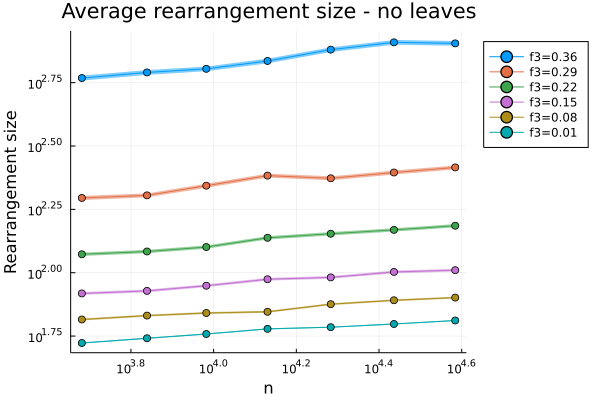

In [48]:
pl = Plots.Plot()
for i in reverse(eachindex(f3s))
    plot!(pl, ns, meansz[i], label="f3=$(f3s[i])", marker=:circle, ribbon=sdsz[i],
        xlabel="n", ylabel="Rearrangement size", yaxis=:log10, xaxis=:log10)
end
plot(pl, title="Average rearrangement size - no leaves", legend=:outertopright)

In [490]:
slopes = zeros(length(meansz))
for i in eachindex(meansz)
    y = log.(meansz[i])
    x = log.(ns)
    if i==6
        deleteat!(y,3); deleteat!(x,3)
    end
    pp = scatter(x,y)
    X = hcat(x, ones(length(x)))
    w = X \ y
    xrange = LinRange(extrema(x)...,100)
    plot!(pp, xrange, xrange.*w[1] .+ w[2], label="Slope $(w[1])")
    slopes[i] = w[1]
end
slopes

6-element Vector{Float64}:
 0.10905951722719293
 0.1079874500011654
 0.10858206188863465
 0.1025316231543482
 0.14023337374022035
 0.12401813298826211

## 2. With sub-extensive number of leaves

In [39]:
ns = 300 * round.(Int, (2 .^ (4:0.5:11)))
@show f3s = 0.3:0.03:0.51
F = length(f3s)
nflips2 = [[Float64[] for n in ns] for f3 in f3s]
navg = 30
nleaves = 50

f3s = 0.3:0.03:0.51 = 0.3:0.03:0.51


50

In [40]:
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        f1 = round(nleaves/n, digits=3)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300)
        b = round(Int, n/N)
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300, B=b, tol=1e-3)
        H = sparse(ldpc_matrix(N, M, NEDGES, LAMBDA, RHO)')
        @show abs(n-N)
    end
end


#### size 1 of 15: n=4800 ####
--- degree 1 of 8: f1=0.01, f3 = 0.3 ---
abs(n - N) = 0
--- degree 2 of 8: f1=0.01, f3 = 0.33 ---
abs(n - N) = 0
--- degree 3 of 8: f1=0.01, f3 = 0.36 ---
abs(n - N) = 0
--- degree 4 of 8: f1=0.01, f3 = 0.39 ---
abs(n - N) = 0
--- degree 5 of 8: f1=0.01, f3 = 0.42 ---
abs(n - N) = 0
--- degree 6 of 8: f1=0.01, f3 = 0.45 ---
abs(n - N) = 0
--- degree 7 of 8: f1=0.01, f3 = 0.48 ---
abs(n - N) = 0
--- degree 8 of 8: f1=0.01, f3 = 0.51 ---
abs(n - N) = 0

#### size 2 of 15: n=6900 ####
--- degree 1 of 8: f1=0.007, f3 = 0.3 ---
abs(n - N) = 150
--- degree 2 of 8: f1=0.007, f3 = 0.33 ---
abs(n - N) = 300
--- degree 3 of 8: f1=0.007, f3 = 0.36 ---
abs(n - N) = 150
--- degree 4 of 8: f1=0.007, f3 = 0.39 ---
abs(n - N) = 300
--- degree 5 of 8: f1=0.007, f3 = 0.42 ---
abs(n - N) = 150
--- degree 6 of 8: f1=0.007, f3 = 0.45 ---
abs(n - N) = 300
--- degree 7 of 8: f1=0.007, f3 = 0.48 ---
abs(n - N) = 150
--- degree 8 of 8: f1=0.007, f3 = 0.51 ---
abs(n - N) = 300

#

In [ ]:
n_not_converged = 0
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        f1 = round(nleaves/n, digits=3)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]; Rho = [0,0,1]
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300)
        b = round(Int, n/N)
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300, B=b, tol=1e-3)
        s = ones(N)
        efield = [(si,-si) .- 1 for si in s]
        ε = Inf; tol = 1e-12; max_att = 50
        nflips2[i][j] = zeros(N)
        nconverged = 0
        for a in 1:navg
            for attempt in 1:max_att  
                H = sparse(ldpc_matrix(N, M, NEDGES, LAMBDA, RHO)')
                maxsum = BPFull(H, efield)
                ε, iters = iteration!(maxsum, maxiter=300, damp=0.0, tol=tol,
                    update_f! = update_factor_ms!, update_v! = update_var_ms!)
#                 @show ε, iters
                if ε < tol 
#                     println("Avg $a of $navg: converged after $attempt attempts") 
                    nflips2[i][j] += [abs(b[2]) for b in maxsum.belief]
                    nconverged += 1
                    break
                elseif attempt == max_att 
                    n_not_converged += 1
                    @warn "Not converged"
                end
            end
        end
        nflips2[i][j] /= nconverged
    end
end


#### size 1 of 15: n=4800 ####
--- degree 1 of 8: f1=0.01, f3 = 0.3 ---
--- degree 2 of 8: f1=0.01, f3 = 0.33 ---
--- degree 3 of 8: f1=0.01, f3 = 0.36 ---
--- degree 4 of 8: f1=0.01, f3 = 0.39 ---
--- degree 5 of 8: f1=0.01, f3 = 0.42 ---
--- degree 6 of 8: f1=0.01, f3 = 0.45 ---
--- degree 7 of 8: f1=0.01, f3 = 0.48 ---
--- degree 8 of 8: f1=0.01, f3 = 0.51 ---

#### size 2 of 15: n=6900 ####
--- degree 1 of 8: f1=0.007, f3 = 0.3 ---
--- degree 2 of 8: f1=0.007, f3 = 0.33 ---
--- degree 3 of 8: f1=0.007, f3 = 0.36 ---
--- degree 4 of 8: f1=0.007, f3 = 0.39 ---
--- degree 5 of 8: f1=0.007, f3 = 0.42 ---
--- degree 6 of 8: f1=0.007, f3 = 0.45 ---
--- degree 7 of 8: f1=0.007, f3 = 0.48 ---
--- degree 8 of 8: f1=0.007, f3 = 0.51 ---

#### size 3 of 15: n=9600 ####
--- degree 1 of 8: f1=0.005, f3 = 0.3 ---
--- degree 2 of 8: f1=0.005, f3 = 0.33 ---
--- degree 3 of 8: f1=0.005, f3 = 0.36 ---
--- degree 4 of 8: f1=0.005, f3 = 0.39 ---
--- degree 5 of 8: f1=0.005, f3 = 0.42 ---
--- degree 6

┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Mai

--- degree 8 of 8: f1=0.003, f3 = 0.51 ---

#### size 6 of 15: n=27300 ####
--- degree 1 of 8: f1=0.002, f3 = 0.3 ---
--- degree 2 of 8: f1=0.002, f3 = 0.33 ---
--- degree 3 of 8: f1=0.002, f3 = 0.36 ---
--- degree 4 of 8: f1=0.002, f3 = 0.39 ---
--- degree 5 of 8: f1=0.002, f3 = 0.42 ---
--- degree 6 of 8: f1=0.002, f3 = 0.45 ---
--- degree 7 of 8: f1=0.002, f3 = 0.48 ---
--- degree 8 of 8: f1=0.002, f3 = 0.51 ---

#### size 7 of 15: n=38400 ####
--- degree 1 of 8: f1=0.001, f3 = 0.3 ---
--- degree 2 of 8: f1=0.001, f3 = 0.33 ---
--- degree 3 of 8: f1=0.001, f3 = 0.36 ---
--- degree 4 of 8: f1=0.001, f3 = 0.39 ---
--- degree 5 of 8: f1=0.001, f3 = 0.42 ---
--- degree 6 of 8: f1=0.001, f3 = 0.45 ---
--- degree 7 of 8: f1=0.001, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Mai

--- degree 8 of 8: f1=0.001, f3 = 0.51 ---

#### size 8 of 15: n=54300 ####
--- degree 1 of 8: f1=0.001, f3 = 0.3 ---
--- degree 2 of 8: f1=0.001, f3 = 0.33 ---
--- degree 3 of 8: f1=0.001, f3 = 0.36 ---
--- degree 4 of 8: f1=0.001, f3 = 0.39 ---
--- degree 5 of 8: f1=0.001, f3 = 0.42 ---
--- degree 6 of 8: f1=0.001, f3 = 0.45 ---
--- degree 7 of 8: f1=0.001, f3 = 0.48 ---
--- degree 8 of 8: f1=0.001, f3 = 0.51 ---
--- degree 2 of 8: f1=0.001, f3 = 0.33 ---
--- degree 3 of 8: f1=0.001, f3 = 0.36 ---
--- degree 4 of 8: f1=0.001, f3 = 0.39 ---
--- degree 5 of 8: f1=0.001, f3 = 0.42 ---


┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Mai

--- degree 6 of 8: f1=0.001, f3 = 0.45 ---
--- degree 7 of 8: f1=0.001, f3 = 0.48 ---
--- degree 8 of 8: f1=0.001, f3 = 0.51 ---

#### size 10 of 15: n=108600 ####
--- degree 1 of 8: f1=0.0, f3 = 0.3 ---
--- degree 2 of 8: f1=0.0, f3 = 0.33 ---
--- degree 3 of 8: f1=0.0, f3 = 0.36 ---
--- degree 4 of 8: f1=0.0, f3 = 0.39 ---
--- degree 5 of 8: f1=0.0, f3 = 0.42 ---
--- degree 6 of 8: f1=0.0, f3 = 0.45 ---
--- degree 7 of 8: f1=0.0, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Mai

--- degree 8 of 8: f1=0.0, f3 = 0.51 ---

#### size 11 of 15: n=153600 ####
--- degree 1 of 8: f1=0.0, f3 = 0.3 ---
--- degree 2 of 8: f1=0.0, f3 = 0.33 ---
--- degree 3 of 8: f1=0.0, f3 = 0.36 ---
--- degree 4 of 8: f1=0.0, f3 = 0.39 ---
--- degree 5 of 8: f1=0.0, f3 = 0.42 ---
--- degree 6 of 8: f1=0.0, f3 = 0.45 ---
--- degree 7 of 8: f1=0.0, f3 = 0.48 ---
--- degree 8 of 8: f1=0.0, f3 = 0.51 ---

#### size 12 of 15: n=217200 ####
--- degree 1 of 8: f1=0.0, f3 = 0.3 ---
--- degree 2 of 8: f1=0.0, f3 = 0.33 ---
--- degree 3 of 8: f1=0.0, f3 = 0.36 ---
--- degree 4 of 8: f1=0.0, f3 = 0.39 ---


┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Main In[41]:30
┌ Warning: Not converged
└ @ Mai

--- degree 5 of 8: f1=0.0, f3 = 0.42 ---
--- degree 6 of 8: f1=0.0, f3 = 0.45 ---


In [ ]:
n_not_converged

In [ ]:
meansz2 = [[mean(nflips2[i][j][.!isinf.(nflips2[i][j])]) for j in eachindex(ns)] for i in eachindex(f3s)]
sdsz2 = [[std(nflips2[i][j][.!isinf.(nflips2[i][j])])/sqrt(navg) for j in eachindex(ns)] for i in eachindex(f3s)]

In [ ]:
pl2 = Plots.Plot()
for i in reverse(eachindex(f3s))
    plot!(pl2, ns, meansz2[i], label="f3=$(f3s[i])", marker=:circle, ribbon=sdsz2[i],
        xlabel="n", ylabel="Rearrangement size", yaxis=:log10, xaxis=:log10)
end
plot(pl2, title="Average rearrangement size - $nleaves leaves", legend=:outertopright)

## 3. With extensive number of leaves

In [25]:
ns = 300 * round.(Int, (2 .^ (4:0.5:11)))
f3s = 0.41:0.01:0.5
@show f3s
F = length(f3s)
nflips3 = [[zeros(n) for n in ns] for f3 in f3s]
navg = 50
f1 = 0.01

f3s = 0.41:0.01:0.5


0.01

In [26]:
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=8))
        m = Int(nedges/3)
        H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
    end
end


#### size 1 of 15: n=4800 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---
--- degree 9 of 10: f1=0.01, f3 = 0.49 ---
--- degree 10 of 10: f1=0.01, f3 = 0.5 ---

#### size 2 of 15: n=6900 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---
--- degree 9 of 10: f1=0.01, f3 = 0.49 ---
--- degree 10 of 10: f1=0.01, f3 = 0.5 ---

#### size 3 of 15: n=9600 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
-

In [27]:
n_not_converged = 0
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]; Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
        m = Int(nedges/3)
        s = ones(n)
        efield = [(si,-si) .- 1 for si in s];
        ε = Inf; tol = 1e-12; max_att = 10
        nconverged = 0
        for a in 1:navg
            for attempt in 1:max_att
                H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
                maxsum = BPFull(H, efield)
                ε, iters = iteration!(maxsum, maxiter=300, damp=0.0, tol=tol,
                    update_f! = update_factor_ms!, update_v! = update_var_ms!)
#                 @show ε, iters
                if ε < tol 
#                     println("Avg $a of $navg: converged after $attempt attempts")  
                    nflips3[i][j] += [abs(b[2]) for b in maxsum.belief]
                    nconverged += 1
                    break
                elseif attempt == max_att 
                    n_not_converged += 1
                    @warn "Not converged"
                end
            end
        end
        nflips3[i][j] /= nconverged
    end
end


#### size 1 of 15: n=4800 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---


┌ Warning: Not converged
└ @ Main In[27]:27


--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 2 of 15: n=6900 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---


┌ Warning: Not converged
└ @ Main In[27]:27


--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27


--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 3 of 15: n=9600 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27


--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 4 of 15: n=13500 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27


--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 5 of 15: n=19200 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 6 of 15: n=27300 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 7 of 15: n=38400 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 8 of 15: n=54300 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 9 of 15: n=76800 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 10 of 15: n=108600 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 11 of 15: n=153600 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---
--- degree 2 of 10: f1=0.01, f3 = 0.42 ---
--- degree 3 of 10: f1=0.01, f3 = 0.43 ---
--- degree 4 of 10: f1=0.01, f3 = 0.44 ---
--- degree 5 of 10: f1=0.01, f3 = 0.45 ---
--- degree 6 of 10: f1=0.01, f3 = 0.46 ---
--- degree 7 of 10: f1=0.01, f3 = 0.47 ---
--- degree 8 of 10: f1=0.01, f3 = 0.48 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 9 of 10: f1=0.01, f3 = 0.49 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai

--- degree 10 of 10: f1=0.01, f3 = 0.5 ---


┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Main In[27]:27
┌ Warning: Not converged
└ @ Mai


#### size 12 of 15: n=217200 ####
--- degree 1 of 10: f1=0.01, f3 = 0.41 ---


LoadError: InexactError: Int64(521280.0000000001)

In [28]:
n_not_converged

1375

In [29]:
meansz3 = [[mean(nflips3[i][j][.!iszero.(nflips3[i][j])]) for j in eachindex(ns)] for i in eachindex(f3s)]
sdsz3 = [[std(nflips3[i][j][.!iszero.(nflips3[i][j])])/sqrt(navg) for j in eachindex(ns)] for i in eachindex(f3s)]

10-element Vector{Vector{Float64}}:
 [2.912919918016188, 2.925684232809663, 2.990964618071666, 2.923793221789902, 2.9305017772843382, 2.9264283443250676, 2.8765653561222226, 2.898222320299072, 2.90352222771803, 2.8925016992411243, 2.886691133873542, NaN, NaN, NaN, NaN]
 [3.8188817074212698, 3.9008715089720942, 3.7127949780662655, 3.702648356580737, 3.719171337984684, 3.6124459341533206, 3.6792293468893944, 3.628265718873644, 3.6570762911033508, 3.638646911904856, 3.619795216725141, NaN, NaN, NaN, NaN]
 [5.3318610187906605, 4.960461919390325, 5.0085715874969425, 4.984176528384392, 4.878194629878412, 4.873533346784812, 4.736930862114509, 4.696953134434996, 4.807134816387164, 4.769600004887354, 4.784024987835848, NaN, NaN, NaN, NaN]
 [7.59001473971206, 7.0491334269385275, 7.6414837999191745, 6.845440261002253, 6.9646538061928025, 6.92663440975277, 6.848724438039933, 6.6161431005115645, 6.745826927396266, 6.628154358164685, 6.600562912265842, NaN, NaN, NaN, NaN]
 [11.464271855012742, 13.86

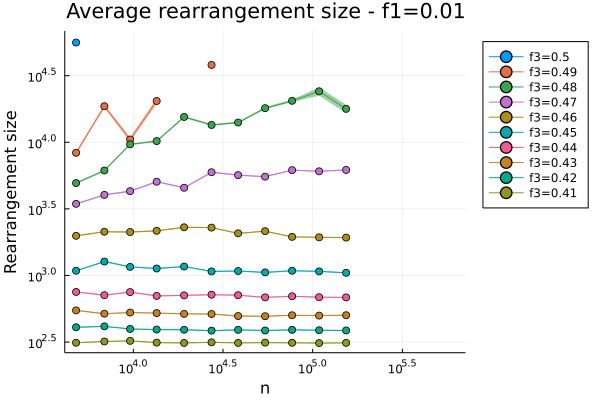

GKS: Number of points is invalid in routine FILLAREA
GKS: Number of points is invalid in routine FILLAREA


In [33]:
pl3 = Plots.Plot()
for i in reverse(eachindex(f3s))
    plot!(pl3, ns, meansz3[i], label="f3=$(f3s[i])", marker=:circle, ribbon=sdsz3[i],
        xlabel="n", ylabel="Rearrangement size", yaxis=:log10, xaxis=(:log10))
end
plot(pl3, title="Average rearrangement size - f1=$f1", legend=:outertopright)

In [34]:
slopes = zeros(length(meansz3))
for i in eachindex(meansz3)
    y = log.(meansz3[i])
    x = log.(ns)
    if i==6
        deleteat!(y,3); deleteat!(x,3)
    end
    pp = scatter(x,y)
    X = hcat(x, ones(length(x)))
    w = X \ y
    xrange = LinRange(extrema(x)...,100)
    plot!(pp, xrange, xrange.*w[1] .+ w[2], label="Slope $(w[1])")
    slopes[i] = w[1]
end
[f3s slopes]

10×2 Matrix{Float64}:
 0.41  NaN
 0.42  NaN
 0.43  NaN
 0.44  NaN
 0.45  NaN
 0.46  NaN
 0.47  NaN
 0.48  NaN
 0.49  NaN
 0.5   NaN